In [18]:
! .././ns3 run project.cc

[  0%] Building CXX object scratch/CMakeFiles/scratch_project.dir/project.cc.o
[  0%] Linking CXX executable "/Users/maganthseetharaman/Desktop/ICS 234/ns-3-dev/build/scratch/ns3-dev-project-default"
NS_ASSERT failed, cond="uid != 0", msg="Assert in TypeId::LookupByName: ns3::TcpReno not found", file=/Users/maganthseetharaman/Desktop/ICS 234/ns-3-dev/src/core/model/type-id.cc, line=844
NS_FATAL, terminating
libc++abi: terminating
Command 'build/scratch/ns3-dev-project-default' died with <Signals.SIGABRT: 6>.


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
RESULTS_DIR = '../results/flow_stats.csv'

In [21]:
data = pd.read_csv(RESULTS_DIR)
data

,Flow ID,Time,Throughput,Window Size,Packets Dropped
0,0 (10.1.1.1 -> 10.2.1.2),0.561135,0.009752,11,0
1,1 (10.1.2.1 -> 10.2.2.2),0.702248,0.007792,11,0
2,2 (10.1.3.1 -> 10.2.2.2),0.843362,0.006488,11,0
3,0 (10.1.1.1 -> 10.2.1.2),1.184470,0.008510,12,0
4,1 (10.1.2.1 -> 10.2.2.2),1.325590,0.007604,12,0
...,...,...,...,...,...
259,2 (10.1.3.1 -> 10.2.2.2),58.899800,0.004474,18,21
260,1 (10.1.2.1 -> 10.2.2.2),59.182000,0.004842,2,23
261,2 (10.1.3.1 -> 10.2.2.2),59.323100,0.004520,13,21
262,2 (10.1.3.1 -> 10.2.2.2),59.605400,0.004498,5,21


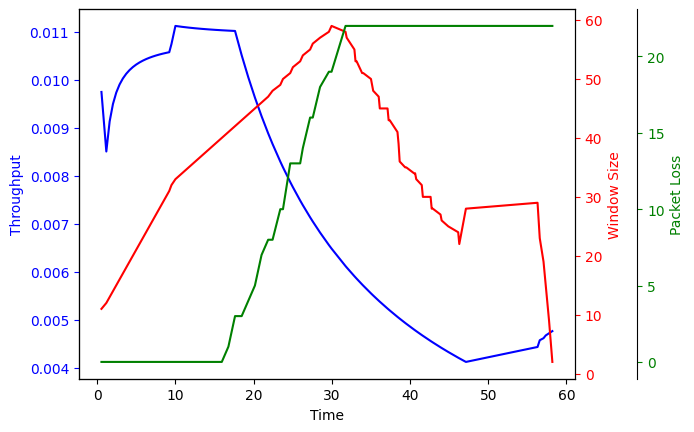

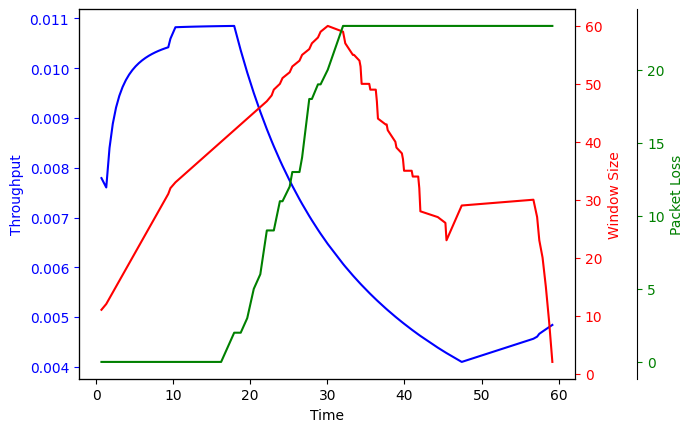

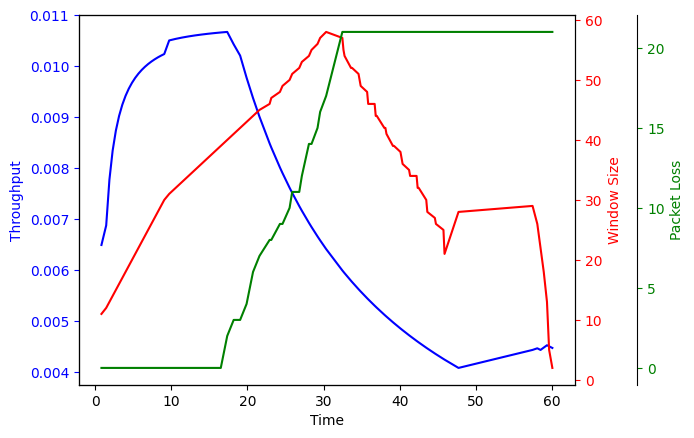

In [22]:
flow_ids = data['Flow ID'].unique()

for flow_id in flow_ids:
    flow_data = data[data['Flow ID'] == flow_id]

    time = flow_data['Time']
    throughput = flow_data['Throughput']
    window_size = flow_data['Window Size']
    packet_loss = flow_data['Packets Dropped']

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()

    color = 'blue'
    ax1.plot(time, throughput, label=f'Flow ID: {flow_id}', color=color)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Throughput', color=color)
    ax1.tick_params('y', colors=color)

    color = 'red'
    ax2.plot(time, window_size, label=f'Flow ID: {flow_id}', color=color)
    ax2.set_ylabel('Window Size', color=color)
    ax2.tick_params('y', colors=color)

    color = 'green'
    ax3.plot(time, packet_loss, label=f'Flow ID: {flow_id}', color=color)
    ax3.set_ylabel('Packet Loss', color=color)
    ax3.tick_params('y', colors=color)
    ax3.spines['right'].set_position(('outward', 45))
    
    # Display the plot
    plt.show()
    plt.close()